# AAA-AI Research Statistical Analysis

This repository contains the code for the statistical analysis of the AAA-AI research project. The programming language used is Python.  

## Introduction

In this study, we aimed to compare the grading accuracy and consistency between human professors and AI systems. Specifically, we provided a set of 40 synthetic artifacts, generated by ChatGPT, to human professors for grading. These same artifacts were then graded by two AI systems: a custom GPT model from OpenAI and Claude 3.5 from Anthropic. Our objective was to analyze and compare the grading patterns of human and AI graders to understand the reliability and validity of AI-based assessment.

## Data

The dataset analyzed in this notebook contains the following columns:

- **Artifact ID**: Unique identifier for each synthetic artifact.
- **Prompt**: Indicates the prompt used to generate the artifact (e.g., 'A', 'B').
- **Human Grader (WB)**: Grades given by human professors (WB).
- **Human Grader (MB)**: Grades given by human professors (MB).
- **Claude 3.5 Grades**: Grades assigned by Claude 3.5 from Anthropic.
- **Grader-GPT Grade**: Grades assigned by the custom GPT model from OpenAI.
- **Time Human Grader (in seconds)**: Time taken by human graders to evaluate each artifact.
- **Time Grader-GPT (in seconds)**: Time taken by the GPT model to evaluate each artifact.


## Code

In [32]:
#Import Necessary Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import pingouin as pg

Now let's import the dataset from the Excel file and look and the first few rows.

In [33]:
# Local file path
file_path = r"C:\Users\Utente\OneDrive\Desktop\AAA-AI Research\Experimental Data\DATA COLLECTION.xlsx"

df = pd.read_excel(file_path)

# Print first few rows
print(df.head())

   Artifact ID Prompt  Human Grader (WB)  Human Grader (MB)  \
0            1      A                 18                 12   
1            2      A                 18                 14   
2            3      A                 16                 14   
3            4      A                 17                 11   
4            5      A                 18                 11   

   Claude 3.5 Grades  Grader-GPT Grade  Time Human Grader (in seconds)  \
0                 25                25                             120   
1                 24                24                             180   
2                 25                25                             120   
3                 21                24                             180   
4                 25                25                             120   

   Time Grader-GPT (in seconds)  
0                            20  
1                            20  
2                            20  
3                            20  
4     

The grades for prompt 'A' and prompt 'B' are on different scales. Grades for prompt 'A' range from 1 to 25 based on the assignment rubric, while grades for prompt 'B' range from 1 to 70. Therefore, it is useful to standardize all grades for both prompts to a common scale of 1 to 100.

In [34]:
# Create a function to standardize grades
def standardize_grade(row, col):
    if row['Prompt'] == 'A':
        return (row[col] * 100) / 25
    else:
        return (row[col] * 100) / 75

# Apply the function to create new standardized grade columns
df['Human Standardized (WB)'] = df.apply(lambda row: standardize_grade(row, 'Human Grader (WB)'), axis=1)
df['Human Standardized (MB)'] = df.apply(lambda row: standardize_grade(row, 'Human Grader (MB)'), axis=1)

df['GPT Standardized'] = df.apply(lambda row: standardize_grade(row, 'Grader-GPT Grade'), axis=1)
df['Claude Standardized'] = df.apply(lambda row: standardize_grade(row, 'Claude 3.5 Grades'), axis=1)

# Print one example column to ensure the function was applied correctly
print(df['Human Standardized (WB)'].head())

0    72.0
1    72.0
2    64.0
3    68.0
4    72.0
Name: Human Standardized (WB), dtype: float64


Now that we have standardized our grade columns, let's visualize the grade distributions from different graders using both histograms and bar plots.

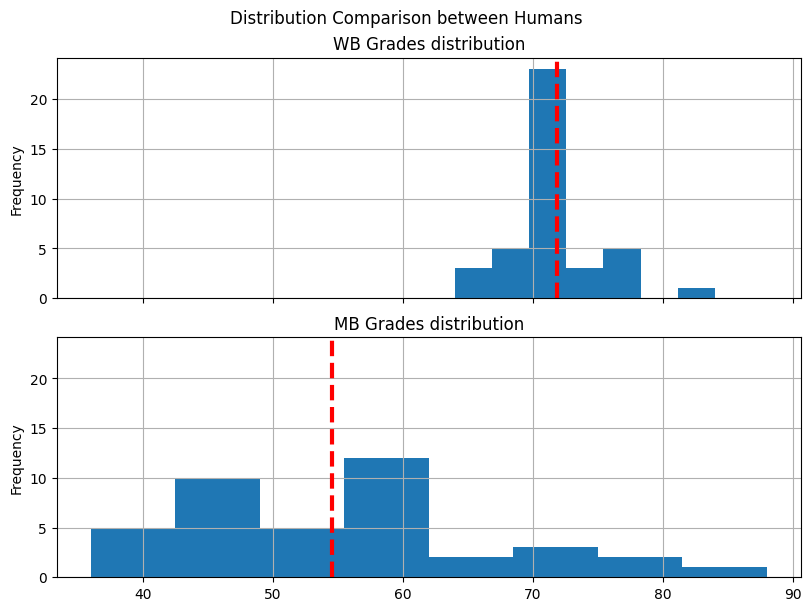

In [35]:
# Histograms
# Compare Humans graders
fig, ax = plt.subplots(ncols = 1, nrows =2, figsize=(8,6), constrained_layout=True, sharex=True, sharey=True)
plt.suptitle("Distribution Comparison between Humans")

ax[0].hist(df["Human Standardized (WB)"], bins='auto')
ax[0].axvline(np.mean(df["Human Standardized (WB)"]), linestyle = "--", linewidth=3, color="r")
ax[0].grid()
ax[0].set_ylabel("Frequency")
ax[0].set_title("WB Grades distribution")


ax[1].hist(df["Human Standardized (MB)"], bins='auto')
ax[1].axvline(np.mean(df["Human Standardized (MB)"]), linestyle = "--", linewidth=3, color="r")
ax[1].grid()
ax[1].set_ylabel("Frequency")
ax[1].set_title("MB Grades distribution")

plt.show()

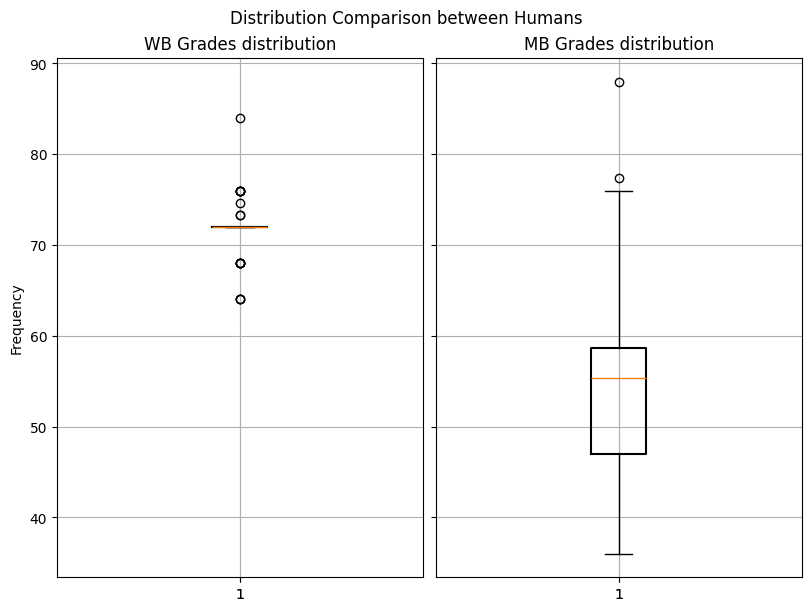

In [36]:
# Bar Plots
# Compare Humans graders
fig, ax = plt.subplots(ncols = 2, nrows =1, figsize=(8,6), constrained_layout=True, sharex=True, sharey=True)
plt.suptitle("Distribution Comparison between Humans")
boxprops = dict(linestyle='-',linewidth=1.5)

ax[0].boxplot(df["Human Standardized (WB)"], boxprops=boxprops)
ax[0].grid()
ax[0].set_ylabel("Frequency")
ax[0].set_title("WB Grades distribution")


ax[1].boxplot(df["Human Standardized (MB)"], boxprops=boxprops)
ax[1].grid()
ax[1].set_title("MB Grades distribution")

plt.show()

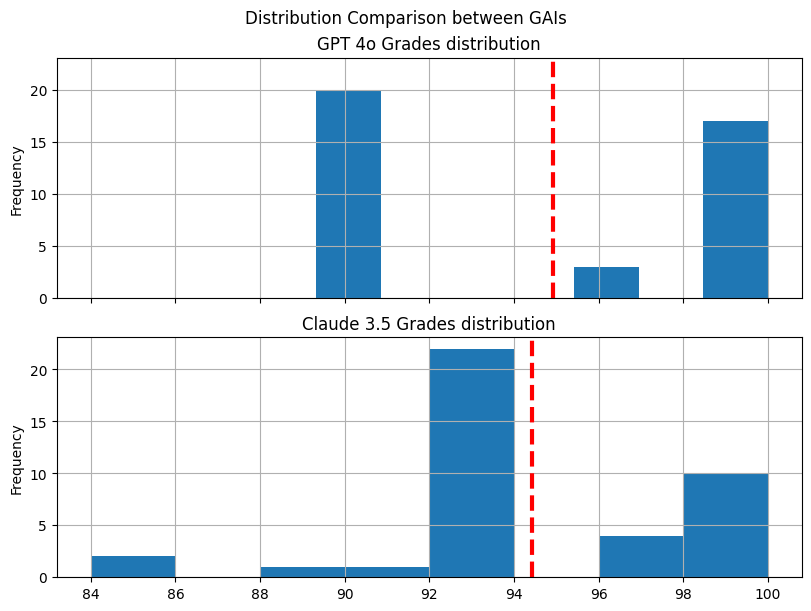

In [37]:
# Histograms
# Compare GAI graders
fig, ax = plt.subplots(ncols = 1, nrows =2, figsize=(8,6), constrained_layout=True, sharex=True, sharey=True)
plt.suptitle("Distribution Comparison between GAIs")

ax[0].hist(df["GPT Standardized"], bins='auto')
ax[0].axvline(np.mean(df["GPT Standardized"]), linestyle = "--", linewidth=3, color="r")
ax[0].grid()
ax[0].set_ylabel("Frequency")
ax[0].set_title("GPT 4o Grades distribution")


ax[1].hist(df["Claude Standardized"], bins='auto')
ax[1].axvline(np.mean(df["Claude Standardized"]), linestyle = "--", linewidth=3, color="r")
ax[1].grid()
ax[1].set_ylabel("Frequency")
ax[1].set_title("Claude 3.5 Grades distribution")

plt.show()

Text(0.5, 1.0, 'Claude 3.5 Grades distribution')

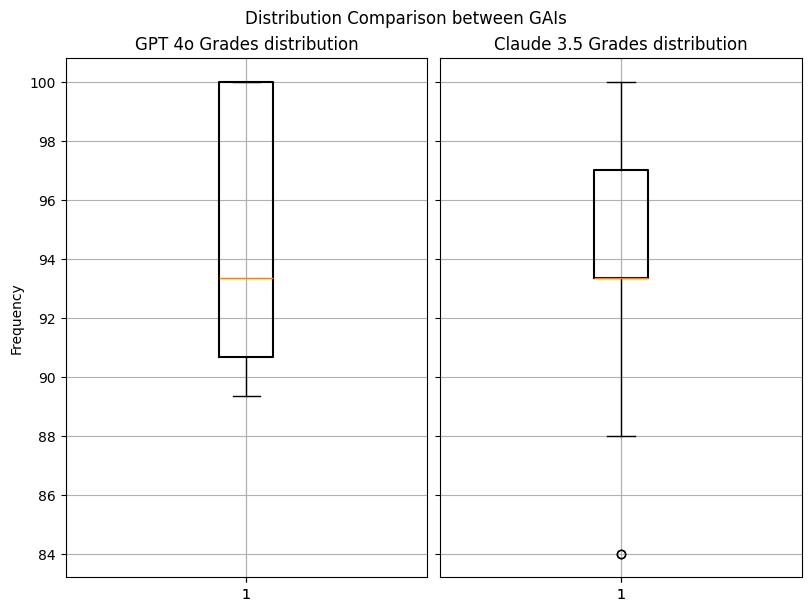

In [38]:
# Boxplots
# Compare GAI graders

fig, ax = plt.subplots(ncols = 2, nrows =1, figsize=(8,6), constrained_layout=True, sharex=True, sharey=True)
plt.suptitle("Distribution Comparison between GAIs")
boxprops = dict(linestyle='-',linewidth=1.5)

ax[0].boxplot(df["GPT Standardized"], boxprops=boxprops)
ax[0].grid()
ax[0].set_ylabel("Frequency")
ax[0].set_title("GPT 4o Grades distribution")


ax[1].boxplot(df["Claude Standardized"], boxprops=boxprops)
ax[1].grid()
ax[1].set_title("Claude 3.5 Grades distribution")

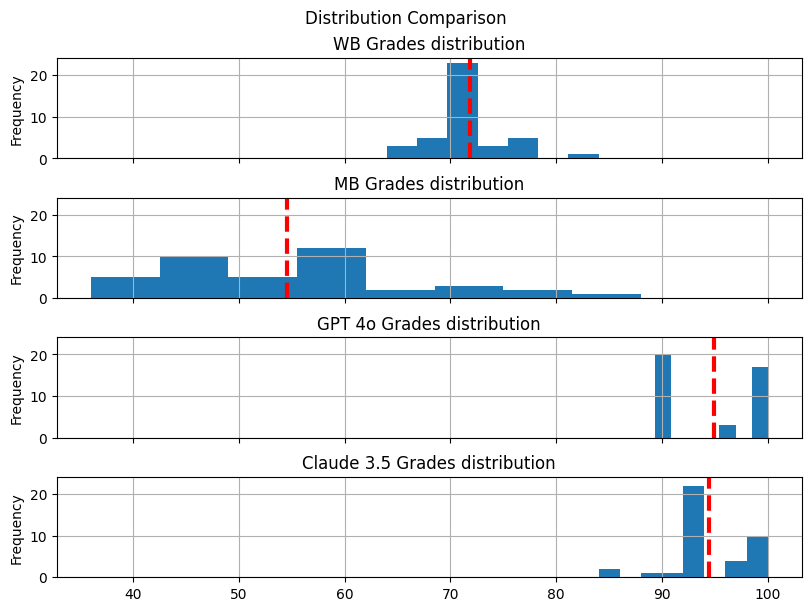

In [39]:
# Histograms
# Comparison among all graders

fig, ax = plt.subplots(ncols = 1, nrows =4, figsize=(8,6), constrained_layout=True, sharex=True, sharey=True)
plt.suptitle("Distribution Comparison")

ax[0].hist(df["Human Standardized (WB)"], bins='auto')
ax[0].axvline(np.mean(df["Human Standardized (WB)"]), linestyle = "--", linewidth=3, color="r")
ax[0].grid()
ax[0].set_ylabel("Frequency")
ax[0].set_title("WB Grades distribution")


ax[1].hist(df["Human Standardized (MB)"], bins='auto')
ax[1].axvline(np.mean(df["Human Standardized (MB)"]), linestyle = "--", linewidth=3, color="r")
ax[1].grid()
ax[1].set_ylabel("Frequency")
ax[1].set_title("MB Grades distribution")

ax[2].hist(df["GPT Standardized"], bins='auto')
ax[2].axvline(np.mean(df["GPT Standardized"]), linestyle = "--", linewidth=3, color="r")
ax[2].grid()
ax[2].set_ylabel("Frequency")
ax[2].set_title("GPT 4o Grades distribution")


ax[3].hist(df["Claude Standardized"], bins='auto')
ax[3].axvline(np.mean(df["Claude Standardized"]), linestyle = "--", linewidth=3, color="r")
ax[3].grid()
ax[3].set_ylabel("Frequency")
ax[3].set_title("Claude 3.5 Grades distribution")

plt.show()

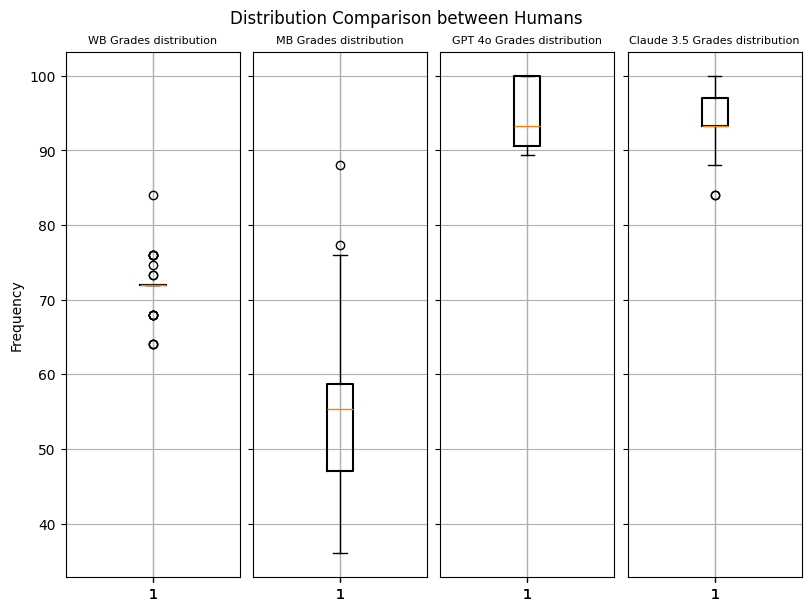

In [40]:
# Boxplots
# Comparison among all graders
fig, ax = plt.subplots(ncols = 4, nrows =1, figsize=(8,6), constrained_layout=True, sharex=True, sharey=True)
plt.suptitle("Distribution Comparison between Humans")
boxprops = dict(linestyle='-',linewidth=1.5)

ax[0].boxplot(df["Human Standardized (WB)"], boxprops=boxprops)
ax[0].grid()
ax[0].set_ylabel("Frequency")
ax[0].set_title("WB Grades distribution", fontsize=8)

ax[1].boxplot(df["Human Standardized (MB)"], boxprops=boxprops)
ax[1].grid()
ax[1].set_title("MB Grades distribution", fontsize=8)

ax[2].boxplot(df["GPT Standardized"], boxprops=boxprops)
ax[2].grid()
ax[2].set_title("GPT 4o Grades distribution", fontsize=8)


ax[3].boxplot(df["Claude Standardized"], boxprops=boxprops)
ax[3].grid()
ax[3].set_title("Claude 3.5 Grades distribution", fontsize=8)

plt.show()


## Statistical Analysis
For the aim of the research we conducted three statistical analysis tests:

1. **ICC (Intraclass correlation coefficients)**:  Use ICC to assess the intra-rater reliability among the two human graders and the two AI graders, as well as the inter-rater reliability between the human graders and the GAI graders.

2. **Pearson's Correlations**: To compare the scores between GAI graders and human graders.

3. **ANOVA (Analysis of Variance)**: To determine if there is a statistically significant difference between the grades assigned by human graders and those given by AI graders.

    3.1 **Tukey's HSD (Honestly Significant Difference)**: To identify the pairs of graders with significant differences in their mean grades.

### Dataset Adjustments

To compute the ICC test in Python, the dataset must be in a specific format. It should have a single column with all the grades, a column indicating the respective graders, and a column specifying the respective artifacts. This ensures that all information about one artifact is contained in a single row. Therefore, this section is dedicated to perform these adjustments.

In [41]:

# Drop useless columns
df = df.drop(["Prompt"], axis=1)

# Rename the columns to have just an achronimous to recognize the grader
df.rename(columns={"Human Standardized (WB)": "WB", "Human Standardized (MB)": "MB", "GPT Standardized": "GPT", "Claude Standardized": "CL"}, inplace=True)

# Melt the DataFrame to long format
df_long = df.melt(id_vars=["Artifact ID"],
                  value_vars=["WB", "MB", "GPT", "CL"],
                  var_name="Grader",
                  value_name="Grade")

# Print the first few rows of the dataframe in the new format
print(df_long.head())

   Artifact ID Grader  Grade
0            1     WB   72.0
1            2     WB   72.0
2            3     WB   64.0
3            4     WB   68.0
4            5     WB   72.0


### ICC (Intraclass correlation coefficients) Code and Results

To compute the intra-rater reliability among human graders, the intra-rater reliability among GAI graders, and the inter-rater reliability between human graders and GAI graders, we split the data into two separate datasets, one containing the human grades and another containing the AI grades.

In [42]:
# Split the data
# Dataframe containing grades given by humans
df_human = df_long[df_long["Grader"].isin(["WB", "MB"])]


# Dataframe containing grades given by GAIs
df_gai = df_long[df_long["Grader"].isin(["GPT", "CL"])]

# Print the first few rows of both
print(df_human.head())
print()
print(df_gai.head())


   Artifact ID Grader  Grade
0            1     WB   72.0
1            2     WB   72.0
2            3     WB   64.0
3            4     WB   68.0
4            5     WB   72.0

    Artifact ID Grader  Grade
80            1    GPT  100.0
81            2    GPT   96.0
82            3    GPT  100.0
83            4    GPT   96.0
84            5    GPT  100.0


In [43]:
# Compute the intra-rater reliability among human graders
icc_human = pg.intraclass_corr(data=df_human, targets="Artifact ID", raters="Grader", ratings="Grade")
icc_human.set_index("Type", inplace=True)
print("Intra-rater reliability among human graders:")
print()
print(icc_human)

Intra-rater reliability among human graders:

                   Description       ICC         F  df1  df2      pval  \
Type                                                                     
ICC1    Single raters absolute -0.442563  0.386422   39   40  0.998187   
ICC2      Single random raters  0.027780  1.173555   39   39  0.309855   
ICC3       Single fixed raters  0.079849  1.173555   39   39  0.309855   
ICC1k  Average raters absolute -1.587847  0.386422   39   40  0.998187   
ICC2k    Average random raters  0.054058  1.173555   39   39  0.309855   
ICC3k     Average fixed raters  0.147888  1.173555   39   39  0.309855   

                CI95%  
Type                   
ICC1   [-0.66, -0.16]  
ICC2    [-0.07, 0.17]  
ICC3    [-0.23, 0.38]  
ICC1k  [-3.87, -0.37]  
ICC2k   [-0.15, 0.29]  
ICC3k   [-0.61, 0.55]  


#### Intra-rater reliability among human graders results
The ICC values for human graders indicate poor agreement between the grades given by the two humans. The confidence intervals include zero or negative values, suggesting that the reliability is not statistically significant. The p-values are all greater than 0.05, indicating that the observed agreement among human graders is not statistically significant.

In [44]:
# Compute the intra-rater reliability among GAI graders
icc_gai = pg.intraclass_corr(data=df_gai, targets="Artifact ID", raters="Grader", ratings="Grade")
icc_gai.set_index("Type", inplace=True)
print("intra-rater reliability among GAI graders: ")
print()
print(icc_gai)

intra-rater reliability among GAI graders: 

                   Description       ICC         F  df1  df2      pval  \
Type                                                                     
ICC1    Single raters absolute  0.377996  2.215414   39   40  0.006994   
ICC2      Single random raters  0.375124  2.183155   39   39  0.008360   
ICC3       Single fixed raters  0.371693  2.183155   39   39  0.008360   
ICC1k  Average raters absolute  0.548617  2.215414   39   40  0.006994   
ICC2k    Average random raters  0.545586  2.183155   39   39  0.008360   
ICC3k     Average fixed raters  0.541947  2.183155   39   39  0.008360   

              CI95%  
Type                 
ICC1   [0.08, 0.61]  
ICC2   [0.07, 0.61]  
ICC3   [0.07, 0.61]  
ICC1k  [0.15, 0.76]  
ICC2k  [0.14, 0.76]  
ICC3k  [0.13, 0.76]  


#### Intra-rater reliability among GAI graders results
The ICC values for GAI graders indicate moderate agreement for single raters and moderate to substantial agreement for average raters. The confidence intervals for all ICC types do not include zero, suggesting that the reliability is statistically significant. The p-values are all less than 0.05, indicating that the observed agreement among GAI graders is statistically significant.

In [45]:
# Compute the inter-rater reliability between human graders and GAI graders
icc_inter = pg.intraclass_corr(data=df_long, targets="Artifact ID", raters="Grader", ratings="Grade")
icc_inter.set_index("Type", inplace=True)
print("inter-rater reliability between human graders and GAI graders: ")
print()
print(icc_inter)

inter-rater reliability between human graders and GAI graders: 

                   Description       ICC         F  df1  df2      pval  \
Type                                                                     
ICC1    Single raters absolute -0.293973  0.091255   39  120  1.000000   
ICC2      Single random raters -0.007404  0.756335   39  117  0.840148   
ICC3       Single fixed raters -0.064868  0.756335   39  117  0.840148   
ICC1k  Average raters absolute -9.958302  0.091255   39  120  1.000000   
ICC2k    Average random raters -0.030290  0.756335   39  117  0.840148   
ICC3k     Average fixed raters -0.322166  0.756335   39  117  0.840148   

                 CI95%  
Type                    
ICC1    [-0.31, -0.27]  
ICC2     [-0.02, 0.02]  
ICC3     [-0.15, 0.07]  
ICC1k  [-16.76, -5.32]  
ICC2k    [-0.08, 0.06]  
ICC3k    [-1.15, 0.24]  


#### Inter-rater reliability between human graders and GAI graders results
The ICC values indicate poor agreement between human graders and GAI graders. The negative ICC values suggest poor agreement, while the confidence intervals for most ICC types include zero or negative values, indicating that the reliability is not statistically significant. The p-values are all greater than 0.05, further confirming that the observed agreement is not statistically significant.

### Pearson's Correlations Code and Results

In [46]:
# Use the original dataframe in a wide format
# Extract human and GAI grades
human_grader_WB = df["WB"]
human_grader_MB = df["MB"]
gai_grader_GPT = df["GPT"]
gai_grader_CL = df["CL"]

# Compute Pearson correlations
# Human WB and GPT-4o
corr_WB_GPT, pval_WB_GPT = pearsonr(human_grader_WB, gai_grader_GPT)

# Human WB and Claude 3.5
corr_WB_CL, pval_WB_CL = pearsonr(human_grader_WB, gai_grader_CL)

# Human MB and GPT-4o
corr_MB_GPT, pval_MB_GPT = pearsonr(human_grader_MB, gai_grader_GPT)

# Human MB and Claude 3.5
corr_MB_CL, pval_MB_CL = pearsonr(human_grader_MB, gai_grader_CL)

# Human WB and Human MB
corr_WB_MB, pval_WB_MB = pearsonr(human_grader_WB, human_grader_MB)

# GPT-4o and Claude 3.5
corr_GPT_CL, pval_GPT_CL = pearsonr(gai_grader_GPT, gai_grader_CL)

# Print the coefficents, Human VS GAI
print(f"Pearson correlation between Human Grader (WB) and Grader-GPT Grades: {corr_WB_GPT}, p-value: {pval_WB_GPT}")
print(f"Pearson correlation between Human Grader (WB) and Claude 3.5 Grades: {corr_WB_CL}, p-value: {pval_WB_CL}")
print(f"Pearson correlation between Human Grader (MB) and Grader-GPT Grades: {corr_MB_GPT}, p-value: {pval_MB_GPT}")
print(f"Pearson correlation between Human Grader (MB) and Claude 3.5 Grades: {corr_MB_CL}, p-value: {pval_MB_CL}")
print()
# Coefficents between humans
print(f"Pearson correlation between Human Grader (WB) and Human Grader (MB): {corr_WB_MB}, p-val: {pval_WB_MB}")

# Coefficents between GAIs
print(f"Pearson correlation between Grader-GPT and Claude 3.5: {corr_GPT_CL}, p-val:{pval_GPT_CL}")

Pearson correlation between Human Grader (WB) and Grader-GPT Grades: -0.29131693398965186, p-value: 0.06818075859658876
Pearson correlation between Human Grader (WB) and Claude 3.5 Grades: 0.07833233766194872, p-value: 0.6309096396517891
Pearson correlation between Human Grader (MB) and Grader-GPT Grades: -0.48852309068492816, p-value: 0.0013824449486007943
Pearson correlation between Human Grader (MB) and Claude 3.5 Grades: -0.027601741329046657, p-value: 0.8657453223894522

Pearson correlation between Human Grader (WB) and Human Grader (MB): 0.14511672756885766, p-val: 0.37162280000790043
Pearson correlation between Grader-GPT and Claude 3.5: 0.3751106530565627, p-val:0.017079305929069838


#### Pearson's Correlations results
There is practically no correlation between the human graders and the AI graders, and the relationships appear to be weakly negative rather than positive. Most surprisingly, there is a statistically significant (p = 0.001) negative correlation between Human Grader (MB) and Grader-GPT, suggesting that they tend to grade artifacts in opposite ways. When one assigns a high grade, the other tends to assign a low grade, and vice versa. A quite interesting result.

### ANOVA (Analysis of Variance) Code and Results

In [47]:
# To perform an ANOVA test we used the dataset in a long format, as we previously did to perform ICC.
anova_results = pg.anova(data=df_long, dv='Grade', between='Grader', detailed=True)

# print the results
print(anova_results)

   Source            SS   DF            MS           F         p-unc       np2
0  Grader  45615.766667    3  15205.255556  311.501269  1.248288e-65  0.856947
1  Within   7614.800000  156     48.812821         NaN           NaN       NaN


#### Results
The ANOVA test indicates that there are significant differences in the mean grades assigned by the different graders (Human Grader WB, Human Grader MB, Claude 3.5 Grades, and Grader-GPT Grades). The large effect size (eta-squared) further supports that the grader type accounts for a significant portion of the variance in grades. 

##### Tukey's HSD (Honestly Significant Difference)
To understand which spcific groups differ from one another, we also performed a post-hoc tests and specifically, a Tukey's HSD (Honestly Significant Difference), to identify the pairs of graders with significant differences in their mean grades.

In [48]:
# Perform post-hoc test
posthoc = pg.pairwise_tukey(dv='Grade', between='Grader', data=df_long)

#Print results
print(posthoc)

     A    B    mean(A)    mean(B)       diff        se          T  \
0   CL  GPT  94.433333  94.933333  -0.500000  1.562255  -0.320050   
1   CL   MB  94.433333  54.566667  39.866667  1.562255  25.518666   
2   CL   WB  94.433333  71.833333  22.600000  1.562255  14.466267   
3  GPT   MB  94.933333  54.566667  40.366667  1.562255  25.838716   
4  GPT   WB  94.933333  71.833333  23.100000  1.562255  14.786317   
5   MB   WB  54.566667  71.833333 -17.266667  1.562255 -11.052399   

        p-tukey    hedges  
0  9.886208e-01 -0.113428  
1  8.326673e-15  4.405112  
2  8.326673e-15  5.832311  
3  8.326673e-15  4.390760  
4  8.326673e-15  5.501161  
5  8.326673e-15 -1.929200  


#### Results
The post-hoc test results align with our expectations. There is no significant difference between the grades assigned by Claude 3.5 and Grader-GPT (p-value = 0.98, p-value > 0.05). However, there are substantial differences between the grades assigned by AI graders and human graders, as well as significant differences between the two human graders themselves (p-value = 8.3e-15, p-value << 0.05).

# Conclusion
Based on these preliminary tests, it appears that GAI graders and human graders evaluate artifacts very differently. Human graders themselves do not grade consistently, likely due to the varying subjects they are accustomed to assessing. In contrast, the two GAI graders used a similar standard for grading the artifacts. One possible explanation for this could be that, since the artifacts were created by GPT-4, the GAI graders "favored" and assigned higher grades to artifacts generated by their own model. Although this is a plausible hypothesis, it cannot be confirmed. However, the significantly higher grades given by GAI graders compared to human graders suggest that GAI graders may not be as reliable.

More in depth analysis of the reults can be found in the Paper (Link).